#Train MLP neural net (backpropagation) as an XOR gate of 2 inputs

# Set up environment

In [1]:
    # Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Input

## Model building based on Chapter 2 of "Neural network projects with Python"
***<u>1</u>** Starting with creating a new sequential() class  
from tensorflow.keras.models import Sequential

# Create dataset

In [2]:
    # Define XOR inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Explore dataset

XOR Dataset:
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

Value counts for output y:
y
0    2
1    2
Name: count, dtype: int64

Correlation matrix:
     x1   x2    y
x1  1.0  0.0  0.0
x2  0.0  1.0  0.0
y   0.0  0.0  1.0



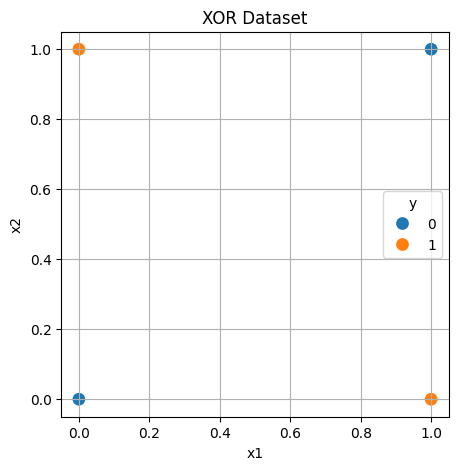

In [3]:
    # Create DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

    # Basic Inspection
print("XOR Dataset:")
print(df)
print()

print("Value counts for output y:")
print(df['y'].value_counts())
print()

print("Correlation matrix:")
print(df.corr())
print()

    # Scatter plot of XOR data
plt.figure(figsize=(5, 5))
plt.grid(True)
sns.scatterplot(data=df, x='x1', y='x2', hue='y', s=100)
plt.title("XOR Dataset")
plt.show()

# Split dataset

In [4]:
    # Split 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=675, shuffle=True)

    # Confirm shapeprint("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Test set: (1, 2) (1, 1)


# Build and train the model

In [15]:
    # Build model with Binary Crossentropy
    # (BCE typically converges faster and more cleanly for classification)

model_bce = Sequential([
    Input(shape=(2,)),
    Dense(2, activation='sigmoid'),
    Dense(1, activation='sigmoid')])

model_bce.compile(optimizer=SGD(learning_rate=0.1),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_bce = model_bce.fit(X_train, y_train, epochs=500, verbose=0)

# Make predictions

In [6]:
    # Predict probabilities
y_pred_probs = model_bce.predict(X_test)

    # Convert to binary class
y_pred_classes = (y_pred_probs > 0.5).astype(int)

    # Show predictions vs actual
print("Predicted Probabilities:", y_pred_probs.ravel())
print("Predicted Classes:     ", y_pred_classes.ravel())
print("Actual Labels:         ", y_test.ravel())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Probabilities: [0.93492407]
Predicted Classes:      [1]
Actual Labels:          [0]


#Evaluate results

In [7]:
    # Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

    # Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

    # Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, digits=2, zero_division=0))

Accuracy: 0.0

Confusion Matrix:
[[0 1]
 [0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



> With only 1 input in the test set, we are unable to get any meaningful return; Neither 0.00 nor 1.00 would actually tell us how well the model learned to differentiate this XOR. It is still learning (guessing) as seen in the training history below.

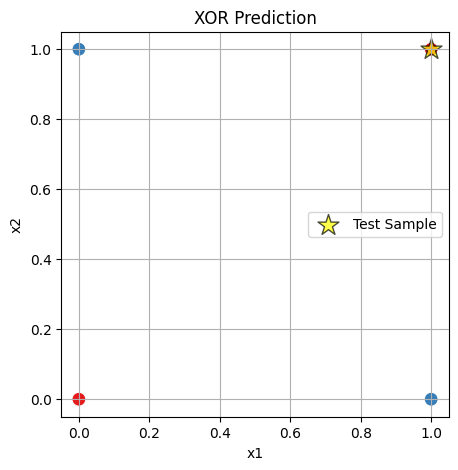

In [8]:
    # Display the 4 points of simple model
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.ravel(), s=100, palette='Set1', legend=False)
plt.scatter(X_test[:, 0], X_test[:, 1], c='yellow', s=250, marker='*', alpha=0.7, edgecolor='black', label='Test Sample')
plt.title("XOR Prediction")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

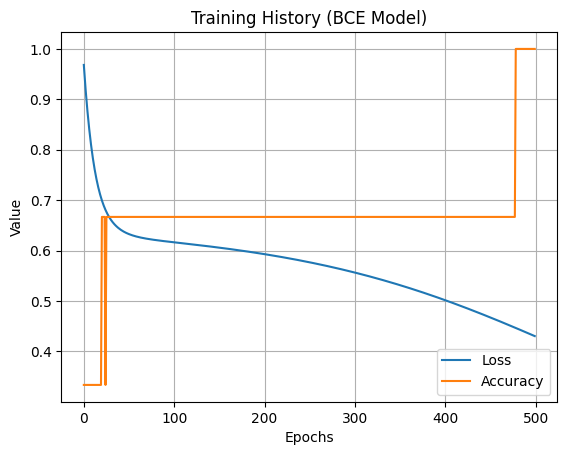

In [16]:
    # Display training performance
plt.plot(history_bce.history['loss'], label='Loss')
plt.plot(history_bce.history['accuracy'], label='Accuracy')
plt.title("Training History (BCE Model)")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

#Tune model

Confusion Matrix:
[[2 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         2

    accuracy                          1.000         4
   macro avg      1.000     1.000     1.000         4
weighted avg      1.000     1.000     1.000         4



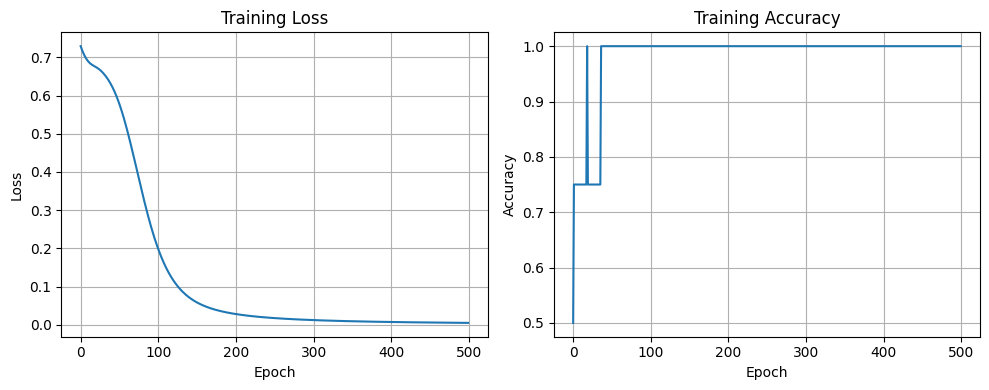

In [10]:
from tensorflow.keras.optimizers import Adam

np.random.seed(675)

model_tune9 = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='tanh'),    # More neurons, tanh works great for XOR
    Dense(1, activation='sigmoid')])

model_tune9.compile(optimizer=Adam(learning_rate=0.01),     # Adam converges faster
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

hist_tune9 = model_tune9.fit(X, y, epochs=500, verbose=0)

y_pred_tune9 = (model_tune9(X, training=False).numpy() > 0.5).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_tune9))
print("\nClassification Report:")
print(classification_report(y, y_pred_tune9, digits=3, zero_division=0))

    # Plot training history
plt.figure(figsize=(10, 4))

    # Loss plot
plt.subplot(1, 2, 1)
plt.plot(hist_tune9.history['loss'], label='Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(hist_tune9.history['accuracy'], label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()

## MLP Model Configuration (Tuned for XOR)

###Tuning choices:
- **Activation Function:** tanh (hidden), sigmoid (output)  
-- relu had improvement over sigmoid, and tanh was was as fast as relu to reach accuracy (under 100 epochs), but tanh continued to reduce loss towards 0.

- **Optimizer:** Adam
-- showed marked improvement over SGD

- **Hidden Layer Neurons:** 8
-- ran multiple models with 2, 4, and 8 neurons for both relu and tanh.

###No Change:
- **Input Features:** 2
- **Random Seed:** 675
- **Epochs:** 500
- **Learning Rate:** 0.1
- **Loss Function:** Binary Crossentropy

###Next steps:
- We could continue testing larger neuron counts in the hidden layer
- Would another hidden layer improve the current model?
- Would weights added to the layers improve the model?

#Compare classification models

In [11]:
    # (Used chatGPT to wrap the tuned_model in a class for comparison)

class KerasXORClassifier:
   def __init__(self, epochs=500, lr=0.1, neurons=4, activation='tanh'):
        self.epochs = epochs
        self.lr = lr
        self.neurons = neurons
        self.activation = activation
        self.model = None

   def fit(self, X, y):
        self.model = Sequential([
            Input(shape=(2,)),
            Dense(self.neurons, activation=self.activation),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer=SGD(learning_rate=self.lr),
                           loss='binary_crossentropy')
        self.model.fit(X, y, epochs=self.epochs, batch_size=32, verbose=0)
        return self

   def predict(self, X):
        return (self.model(X, training=False).numpy() > 0.5).astype(int).ravel()

In [22]:
    # (Used chatGPT again, to compare all models in one code)

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "SVM (RBF kernel)": SVC(kernel='rbf'),
    "MLP (Tuned Keras)": KerasXORClassifier()}

    # Generate XOR dataset
def generate_noisy_xor(n_samples=500, noise=0.2, seed=42):
   np.random.seed(seed)
   X = np.random.randint(0, 2, size=(n_samples, 2))
   y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)
   X = X + np.random.normal(scale=noise, size=X.shape)
   return X, y.reshape(-1, 1)

X2_synth, y2_synth = generate_noisy_xor()

    # Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_synth, y2_synth, test_size=0.2, random_state=42)

    # Initialize results list
results = []

    # Run each model
for name, model in models.items():
   model.fit(X2_train, y2_train.ravel())
   y2_pred = model.predict(X2_test)

    # Compute all metrics
   acc = accuracy_score(y2_test, y2_pred)
   prec = precision_score(y2_test, y2_pred, zero_division=0)
   rec = recall_score(y2_test, y2_pred, zero_division=0)
   f1 = f1_score(y2_test, y2_pred, zero_division=0)

    # Print detailed report
   print(f"\n{name} — Classification Report:")
   print(classification_report(y2_test, y2_pred, digits=3, zero_division=0))

    # Store for summary
   results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Create and display summary DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("\nSummary: Model Comparison with Full Metrics")
print(results_df.to_string(index=False))


Decision Tree — Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        46
           1      1.000     1.000     1.000        54

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100


KNN (k=3) — Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        46
           1      1.000     1.000     1.000        54

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100


SVM (RBF kernel) — Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.978     0.989        46
           1      0.982     1.000     0.991        54

    accuracy                          0.990       100
   macro 

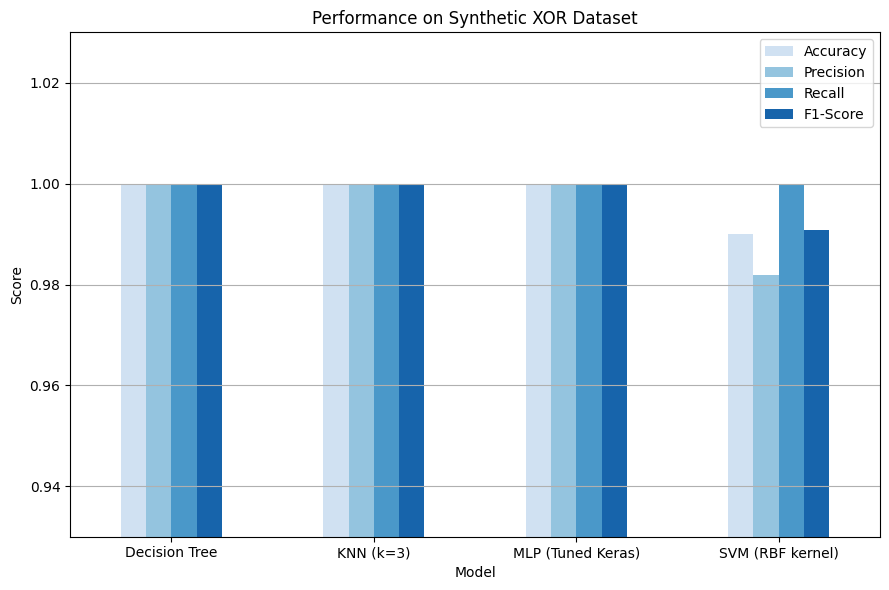

In [23]:
    # Display metrics
colors = sns.color_palette("Blues", n_colors=len(results_df))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df.set_index('Model')[metrics].plot(kind='bar', color=colors, figsize=(9, 6))

plt.title("Performance on Synthetic XOR Dataset")
plt.ylabel("Score")
plt.ylim(.93, 1.03)
plt.grid(True, axis='y')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#ROC Curve evaluation

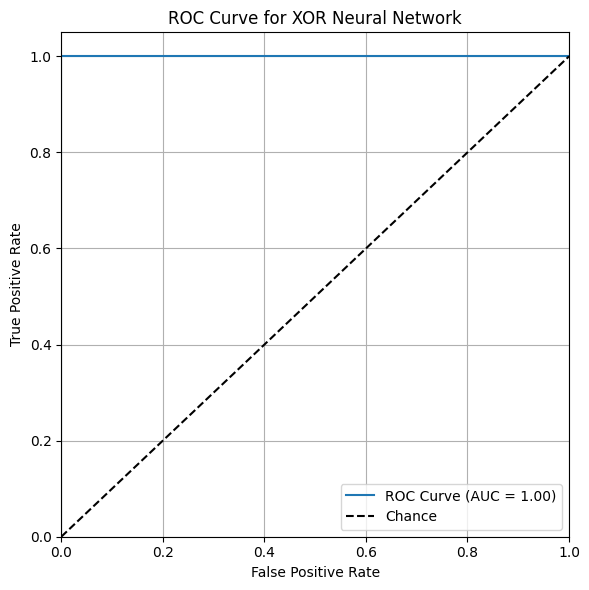

In [24]:
from sklearn.metrics import roc_curve, auc

    # Generate probabilities for ROC
y_prob_roc = model_tune9(X, training=False).numpy().ravel()
y_roc = y.ravel()

    # Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_roc, y_prob_roc)
roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XOR Neural Network")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


###The model perfectly separates the two classes with 100% sensitivity and specificity.

#Project Summary

- **Dataset:** XOR logic modeled using a 4-point truth table and an extended 500-point synthetic dataset with added noise.

- **Neural Network Design:** Tuned a small MLP (8 neurons, tanh hidden, sigmoid output, BCE loss) to successfully learn the XOR pattern to 100% accuracy.

- **Training:** Tuned model could get convergence in under 100 epochs. Training history confirmed model stability and convergence.

- **Batch Testing:** Repeated training and evaluation over 30 runs using synthetic data to gather mean and standard deviation of accuracy.

- **Evaluation Metrics:** Accuracy, Precision, Recall, and F1-score were computed across all models.

- **Model Comparison:** Evaluated and compared the tuned MLP, SVM, KNN, and Decision Tree — MLP, KNN, and decision tree all performed perfectly.  

- **However,** given the simple nature of the problem, it is not surprising to have all the non-linear models perform well. We would not expect to see such perfect metrics in more complex real-world datasets, that would exhibit:  
>- Irregular class boundaries
>- More features and noise
>- Class imbalance

### References
***<u>1</u>** Loy, J. (2019). *Neural network projects with Python* (Chapter 2). Packt Publishing.



### END